In [1]:
import sys

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from hubbard.hubbard import *
from hubbard.utilities import * 

In [2]:
tex_fonts = {
    "pgf.texsystem": "pdflatex",
    'pgf.rcfonts': False,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
N = M = 8

phi_available = [2*np.pi/M * (k+1) for k in range(M)]
#U = .5
#J = 0.02*U
J_SE = 1
#Omega = 0.004 * J_SE
E_gap = abs(np.cos(np.pi/M)-1)

frac = 10

Omega = J_SE*E_gap / frac

phi = 2*np.pi/M * (M//2-1)

psi = 0
theta = np.pi/2
bc = 'open'

N_steps = 200

_, _, _, chi_x, chi_z, _ = open_coeff(phi, N, M, J_SE, Omega, phi_0 = -(M+1)/2*phi)
chi = chi_z + chi_x

t_f = 1/abs(chi)#*np.log(N)/(2*N) 

scaling = np.linspace(1, 2*frac, 3)

print('tf:', t_f)

tf: 206231.8957141666


In [4]:
spin = SpinModel(N, M, bc = bc)
spin.H = spin.H_eff_open(J_SE, Omega, phi, phi_0 = -(M+1)/2*phi)

In [5]:
wf = spin.rotate((theta, psi), spin.initial_state()) 
t1, data1 = spin.evolve(wf, t_f = t_f, num = N_steps, parameters = ['squeezing'])
t1 *= abs(chi)

In [6]:
f = FermiHubbard(N, M, bc = bc)
wf = f.rotate((theta, psi), f.initial_state()) 

In [7]:
t2_list, data2_list = [], []

for scale in scaling: 
    _, _, _, chi_x, chi_z, _ = open_coeff(phi, N, M, J_SE, scale*Omega, phi_0 = -(M+1)/2*phi)
    chi = chi_z + chi_x
    t_f = 1/abs(chi)
    
    f.H = f.H_spin_simple(J_SE, scale*Omega, phi, phi_0 = -(M+1)/2*phi)
    
    t, data = f.evolve(wf, t_f = t_f, num = N_steps, parameters = ['squeezing'])
    t *= abs(chi)
    t2_list.append(t)
    data2_list.append(data)

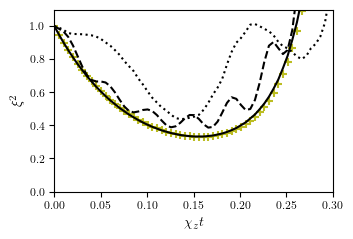

In [16]:
figwidth = 3.416666#*.45
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(figwidth, figwidth*2/3))

ax.scatter(t1, data1[-1], marker = '+', color = 'tab:olive', label = 'spin')
#ax.plot(t1, data1[-1], color = 'tab:olive', label = 'spin')
ls = 'solid', 'dashed', 'dotted'
color = 'tab:purple', 'tab:brown', 'tab:pink'
for i in range(len(t2_list)):
    t, data, scale = t2_list[i], data2_list[i], scaling[i]
    ax.plot(t, data[-1], ls = ls[i], marker = 'None', 
            color = 'black',
            #color = color[i],
            label = f'$\Omega = {scale/frac:.2f}\Omega_0$')

#ax.axhline(1/N, c='grey', ls='dashed', label = 'HL')
#ax.legend()
ax.set_ylim((0,1.1))
ax.set_xlim((0,0.3))
ax.set_xlabel('$\chi_z t$')
ax.set_ylabel(r'$\xi^2$')

fig.savefig(f'output/sq_compare_N{N}.pdf', format='pdf', bbox_inches='tight')